(datetime.datetime(2014, 2, 16, 0, 0), 'missing data')


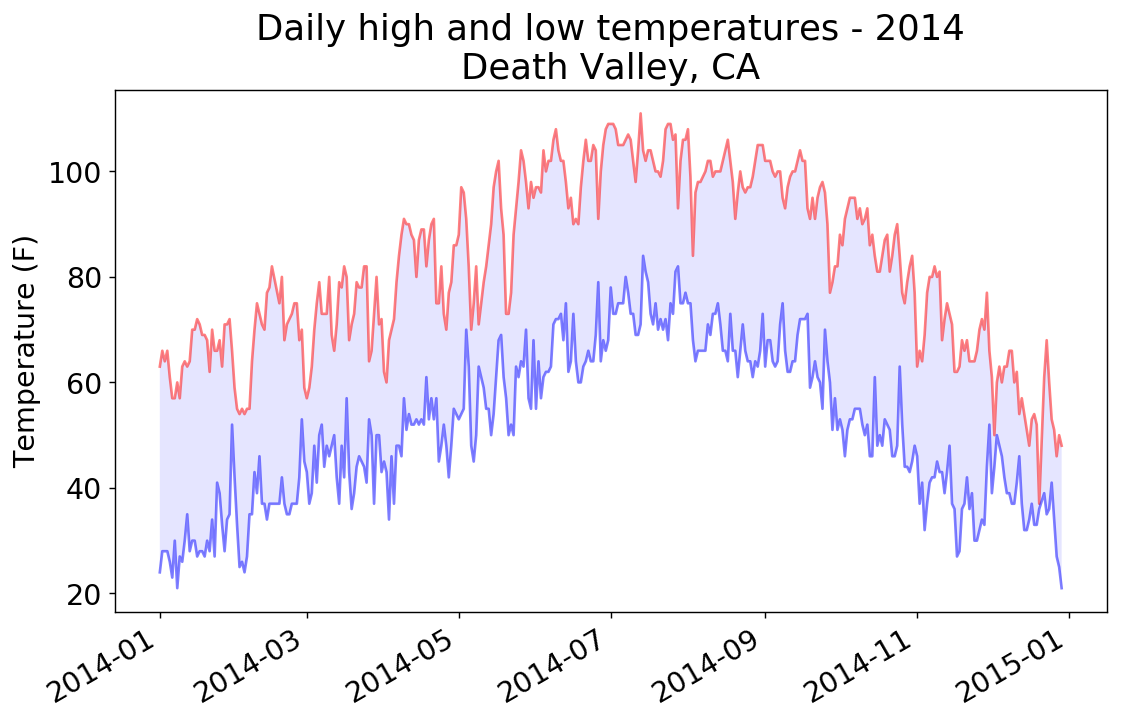

In [1]:
import csv
from datetime import datetime

from matplotlib import pyplot as plt

# Get dates, high, and low temperatures from file.
filename = 'death_valley_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
#     print(header_row)
    dates, highs, lows = [], [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%Y-%m-%d")
            high = int(row[1])
            low = int(row[3])
        except ValueError:
            print(current_date, 'missing data')
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)

# Plot data.
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
title = "Daily high and low temperatures - 2014\nDeath Valley, CA"
plt.title(title, fontsize=20)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

In [4]:
import json

import pygal
from pygal.style import LightColorizedStyle as LCS, RotateStyle as RS
from pygal.maps.world import World
from country_codes import get_country_code

# Load the data into a list.
filename = 'population_data.json'
with open(filename) as f:
    pop_data = json.load(f)

# Build a dictionary of population data.
cc_populations = {}
for pop_dict in pop_data:
    if pop_dict['Year'] == '2010':
        country_name = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
#         print('{}:{}'.format(country_name,population))
        code = get_country_code(country_name)
        if code:
            cc_populations[code] = population

# Group the countries into 3 population levels.
cc_pops_1, cc_pops_2, cc_pops_3 = {}, {}, {}
for cc, pop in cc_populations.items():
    if pop < 10000000:
        cc_pops_1[cc] = pop
    elif pop < 1000000000:
        cc_pops_2[cc] = pop
    else:
        cc_pops_3[cc] = pop

# See how many countries are in each level.        
print(len(cc_pops_1), len(cc_pops_2), len(cc_pops_3))

wm_style = RS('#336699')
wm = World(style=wm_style)
wm.title = 'World Population in 2010, by Country'
wm.add('0-10m', cc_pops_1)
wm.add('10m-1bn', cc_pops_2)
wm.add('>1bn', cc_pops_3)
    
wm.render_to_file('world_population1.svg')

85 69 2
